In [148]:
import Pkg
Pkg.activate(".")

  Activating project at `~/BME574`


In [149]:
Pkg.add(["Random","Images","Colors","MAT","LinearAlgebra","MLDatasets"])

   Resolving package versions...
  No Changes to `~/BME574/Project.toml`
  No Changes to `~/BME574/Manifest.toml`


In [150]:
using Images, Colors, MLDatasets, Random, MAT, LinearAlgebra, Convex, SCS, Plots, Statistics

In [151]:
dataset = MNIST()

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :train
  features  =>    28×28×60000 Array{Float32, 3}
  targets   =>    60000-element Vector{Int64}

In [152]:
testset = MNIST(:test)

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :test
  features  =>    28×28×10000 Array{Float32, 3}
  targets   =>    10000-element Vector{Int64}

In [153]:
dataset.targets

60000-element Vector{Int64}:
 5
 0
 4
 1
 9
 2
 1
 3
 1
 4
 3
 5
 3
 ⋮
 7
 8
 9
 2
 9
 5
 1
 8
 3
 5
 6
 8

In [154]:
dataset.features

28×28×60000 Array{Float32, 3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.215686  0.533333   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.67451   0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.886275  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.831373   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.529412   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.992157  0.517647   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.956863  0.0627451  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0117647     0.521569  0.0    

First I created the labels of length 10. B presents the output vectors. This one-hot encoding structure lets us express the labels in a linear algebraic form compatible with the A⋅X= B equation.

In [155]:
#Create the labels
y_labels = [zeros(10) for _ in 1:10]

10-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [156]:
#Create a set of output (label) vectors  {𝑦𝑗}  of length 10
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

#let  𝐵  be the set of output (label) vectors
y_labels = [zeros(Int, 10) for _ in 1:length(labels)]

for i in 1:length(labels)
    y_labels[i][labels[i] + 1] = 1  #indexing to 1
end

B = reduce(vcat, y_labels) 

100-element Vector{Int64}:
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1
 0
 ⋮
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1

In [157]:
train_x, train_y = MNIST(split=:train)[:]

images = train_x[:,:,1:60000]
train_labels = train_y[1:60000]

60000-element Vector{Int64}:
 5
 0
 4
 1
 9
 2
 1
 3
 1
 4
 3
 5
 3
 ⋮
 7
 8
 9
 2
 9
 5
 1
 8
 3
 5
 6
 8

In [158]:
B = zeros(Int, 60000, 10)
for i in 1:60000
    B[i, train_labels[i] + 1] = 1 
end 

Each image in the MNIST dataset is originally 28x28 pixels. By reshaping each image into a 784-dimensional row vector, We create a matrix A where each row represents an image. Each column corresponds to a pixel position across all images.

In [159]:
#Let the matrix  𝐴  be the corresponding reshaped (vectorized) MNIST images (one in each row)
A = (reshape(dataset.features[:, :, 1:60000], 28 *28, 60000)')

60000×784 adjoint(::Matrix{Float32}) with eltype Float32:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  

LASSO algorithm is used to solve AX=B LASSO promotes sparsity in the solution, which aligns with the goal of finding the most informative pixels. It helps identify a small subset of pixels that are most crucial for classification.

In [160]:
#Dr. Strey's lasso function
function lasso(A, B, λ)
    (T, K) = (size(A, 1), size(A, 2))
    Q = A'A / T
    c = A'B / T                      #c'b = Y'X*b

    x = Variable(K)              #define variables to optimize over
    L1 = quadform(x, Q; assume_psd=true)            #b'Q*b
    L2 = dot(c, x)                 #c'b
    L3 = norm(x, 1)                #sum(|b|)

    problem = minimize(L1 - 2 * L2 + λ * L3)
    solve!(problem, SCS.Optimizer; silent = true)
    return vec(Convex.evaluate(x))
end

lasso (generic function with 1 method)

Matrix X(784 by 10) comes from A(60000 by 784) and B(60000 by 10), where each column indicates the relative importance of each pixel for identifying a specific digit.

In [161]:
X = hcat([lasso(A, B[:, i], 0.0025) for i in 1:size(B, 2)]...)

784×10 Matrix{Float64}:
 -6.23536e-19  -2.08676e-18   1.00513e-17  …  -3.02206e-18   9.31002e-18
 -6.23536e-19  -2.08676e-18   1.00513e-17     -3.02206e-18   9.31002e-18
 -6.23536e-19  -2.08676e-18   1.00513e-17     -3.02206e-18   9.31002e-18
 -6.23536e-19  -2.08676e-18   1.00513e-17     -3.02206e-18   9.31002e-18
 -6.23536e-19  -2.08676e-18   1.00513e-17     -3.02206e-18   9.31002e-18
 -6.23536e-19  -2.08676e-18   1.00513e-17  …  -3.02206e-18   9.31002e-18
 -6.23536e-19  -2.08676e-18   1.00513e-17     -3.02206e-18   9.31002e-18
 -6.23536e-19  -2.08676e-18   1.00513e-17     -3.02206e-18   9.31002e-18
 -6.23536e-19  -2.08676e-18   1.00513e-17     -3.02206e-18   9.31002e-18
 -6.23536e-19  -2.08676e-18   1.00513e-17     -3.02206e-18   9.31002e-18
 -6.23536e-19  -2.08676e-18   1.00513e-17  …  -3.02206e-18   9.31002e-18
 -6.23536e-19  -2.08676e-18   1.00513e-17     -3.02206e-18   9.31002e-18
 -1.45009e-10   8.43315e-12   1.04604e-9       1.23842e-12  -1.62509e-9
  ⋮                         

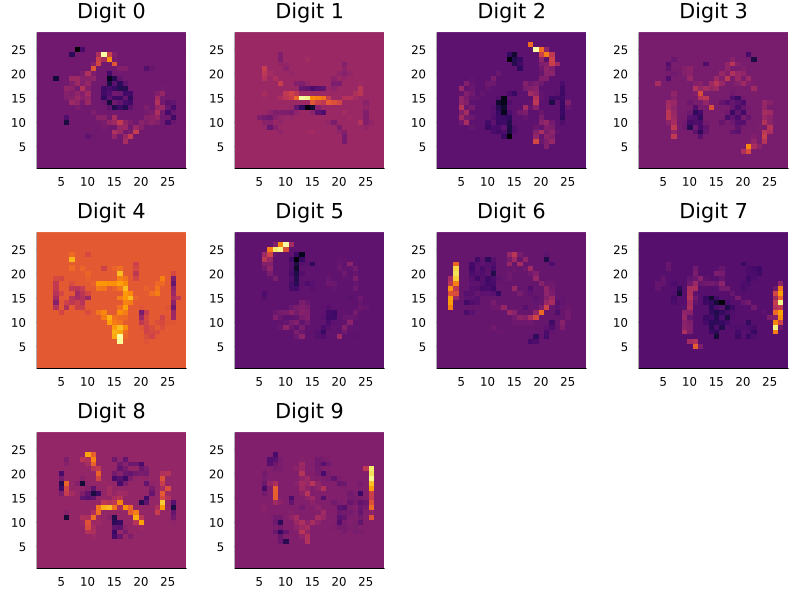

In [162]:
heatmap_grid = plot(layout=(3,4), size=(800,600), legend=false)

for digit in 1:10
    digit_pixels = X[:, digit]
    digit_heatmap = reshape(digit_pixels, 28, 28)

    heatmap!(p[digit], digit_heatmap, 
             title="Digit $(digit-1)")
end

plot!(p[11], axis=false, grid=false)
plot!(p[12], axis=false, grid=false)

Here I defined how many pixels I want to select from X. Then I found the most imprortant digits from X, Weights allow us to get the importance of each pixel when the pixels are classified. Then the pixels are sorted. The reduced A matrices hold the important indices and so we perform lasso on this to get X_reduced which holds the most important pixels.

In [163]:
num_of_pixels = 30

imp_indices = []
for i in 1:10 
    weights = abs.(X[:, i])
    top_indices = sortperm(weights, rev=true)[1:num_of_pixels]
    push!(imp_indices, top_indices)
end

In [164]:
#test dataset
test_features, test_labels = MNIST(split=:test)[:]
test_img = test_features[:, :, 1:10000]  
test_labels = test_labels[1:10000]
tot_pixels = 28 * 28
A_test = reshape(Float64.(test_img), tot_pixels, size(test_img, 3))'
 
imp_indices = unique(vcat(imp_indices...))

#reduced A matrices with informative pixels only
A_train_reduced = A[:, imp_indices]  
A_test_reduced = A_test[:, imp_indices] 

10000×218 Matrix{Float64}:
 0.0        0.0        0.0       0.996078  …  0.0        1.0        0.0
 0.0        0.0        0.0       0.0          0.0        0.0        0.0
 0.0        0.0        0.0       0.0          0.803922   0.0        0.0
 0.0        0.137255   0.0       0.411765     0.0        0.984314   0.0
 0.0        0.0        0.0       0.992157     0.0        0.980392   0.0
 0.0        0.0        0.0       0.0       …  0.996078   0.0        0.0
 0.0        0.0        0.0       0.619608     0.996078   0.662745   0.0
 0.0        0.0        0.0       0.0          0.992157   0.0        0.0
 0.0        0.0        0.666667  0.0          0.0        0.0        0.588235
 0.0196078  0.14902    0.0       0.964706     0.823529   0.94902    0.0
 0.0        0.835294   0.0       0.588235  …  0.0        0.0        0.0
 0.219608   0.988235   0.0       0.988235     0.729412   0.0        0.0
 0.0        0.0        0.0       0.529412     0.0196078  0.745098   0.0
 ⋮                              

In [165]:
λ = 0.0025 
X_reduced = hcat([lasso(A_train_reduced, B[:,i], λ) for i in 1:size(B,2)]...)

218×10 Matrix{Float64}:
  0.0990643    1.11576e-5  -1.19564e-6  …   6.94449e-7  -2.70759e-6
  0.0626754    4.09383e-6  -0.0377991      -3.82877e-7  -2.40359e-6
 -0.0416174   -8.18802e-7  -1.59326e-8      2.62503e-7   5.63718e-7
  0.0384485   -0.00348192  -2.94502e-7      0.0148939    1.97242e-6
  0.0428621    2.3769e-5   -0.0208387      -1.06128e-6   1.5859e-6
 -0.0466573   -5.78599e-5   2.51557e-7  …   6.86567e-7   0.0160978
  0.0391776    3.06784e-5  -7.35555e-7      0.00243576   0.0098016
  0.0365815    1.24683e-5  -0.0111933       5.7631e-8   -2.09331e-6
  0.0306026    2.17304e-5  -1.54578e-6      1.46033e-6  -4.24202e-6
 -0.0447697    4.67915e-6   2.73778e-7     -7.2804e-7    1.26318e-7
 -0.0277932   -1.01963e-5  -0.00160307  …   0.0103161   -5.81209e-7
  0.0522224    1.34863e-5   0.0246942      -1.39011e-6  -1.31764e-6
  0.0466761   -1.91498e-5  -4.96975e-7     -0.025655     0.024658
  ⋮                                     ⋱               
  3.33e-8      2.74525e-6   5.56614e-8  

I computed the scores for each test image by taking the dot product of the weights from X_reduced with A_test_reduced. The result, stored in predicted_digits, contains the 10,000 digits predicted by the model for A_test_reduced.

To calculate the accuracy, I determined how often predicted_digits matched the correct labels in test_labels. The total number of correct predictions was then divided by the total number of test images to obtain the accuracy.

In [166]:
test_img = size(A_test_reduced, 1)
digit_scores = zeros(test_img, 10)

for digit in 1:10
    weights = X_reduced[:, digit]
    digit_scores[:, digit] = A_test_reduced * weights
end

predicted_digits = [argmax(row) - 1 for row in eachrow(digit_scores)]    

#overall accuracy
accuracy = sum(predicted_digits .== test_labels) / test_img
println("Accuracy: ", accuracy)


Accuracy: 0.8354


The analysis was repeated for each digit separately as it will allow us to identify pixel importance specific 
to each digit and will provide insights into how different digits are distinguished.

In [167]:
num_of_pixels = 30  
imp_indices_by_digit = Dict{Int, Vector{Int}}()

for digit in 0:9
    B_per_d = Float64.(train_labels .== digit)  
    B_per_d = reshape(B_per_d, :, 1)
    X_reduced_digit = lasso(A, B_per_d, 0.0025)
    weights_digit = abs.(X_reduced_digit)
    top_indices = sortperm(weights_digit, rev=true)[1:num_of_pixels]
    imp_indices_by_digit[digit] = top_indices
end

In [168]:
imp_indices = unique(vcat(values(imp_indices_by_digit)...))
A_train_reduced = A[:, imp_indices]
A_test_reduced = A_test[:, imp_indices]

λ = 0.0025  
X_reduced = hcat([lasso(A_train_reduced, Float64.(train_labels .== i), λ) for i in 0:9]...)
test_img = size(A_test_reduced, 1)
digit_scores = zeros(test_img, 10)

for digit in 1:10
    weights = X_reduced[:, digit]
    digit_scores[:, digit] = A_test_reduced * weights
end

predicted_digits = [argmax(row) - 1 for row in eachrow(digit_scores)]

accuracy = sum(predicted_digits .== test_labels) / test_img
println("Accuracy: ", accuracy)


Accuracy: 0.8354


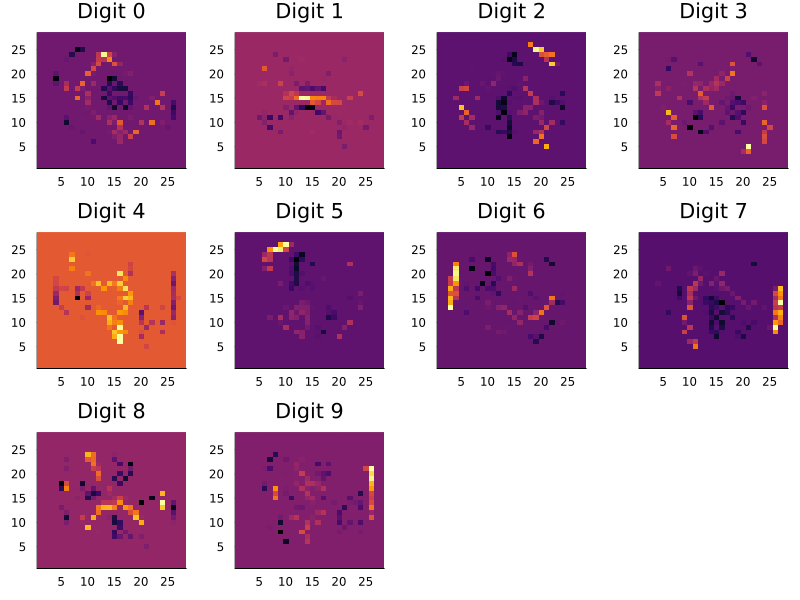

In [169]:
heatmap_grid = plot(layout=(3,4), size=(800,600), legend=false)

for digit in 1:10
    digit_pixels = X_reduced[:, digit]
    full_image = zeros(784)
    full_image[imp_indices] .= digit_pixels  
    digit_heatmap = reshape(full_image, 28, 28)
    
    heatmap!(p[digit], digit_heatmap,  
             title="Digit $(digit-1)")
end

plot!(p[11], axis=false, grid=false)
plot!(p[12], axis=false, grid=false)